In [10]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
import io
import requests
import zipfile
url = ('https://github.com/ipython-books/'
       'cookbook-2nd-data/blob/master/'
       'babies.zip?raw=true')
r = io.BytesIO(requests.get(url).content)
zipfile.ZipFile(r).extractall('babies')

# Autocorrelate
- We are measuring how some baby names are diminishing
ref: https://ipython-books.github.io/103-computing-the-autocorrelation-of-a-time-series/

In [12]:
files = [file for file in os.listdir('babies')
         if file.startswith('yob')]
years = np.array(sorted([int(file[3:7])
                         for file in files]))
data = {year:
        pd.read_csv('babies/yob%d.txt' % year,
                    index_col=0, header=None,
                    names=['First name',
                           'Gender',
                           'Number'])
        for year in years}

In [13]:

data[2016].head()

,Gender,Number
First name,,
Emma,F,19414
Olivia,F,19246
Ava,F,16237
Sophia,F,16070
Isabella,F,14722


In [14]:
def get_value(name, gender, year):
    """Return the number of babies born a given year,
    with a given gender and a given name."""
    dy = data[year]
    try:
        return dy[dy['Gender'] == gender] \
                 ['Number'][name]
    except KeyError:
        return 0
def get_evolution(name, gender):
    """Return the evolution of a baby name over
    the years."""
    return np.array([get_value(name, gender, year)
                     for year in years])

In [15]:
def autocorr(x):
    result = np.correlate(x, x, mode='full')
    return result[result.size // 2:]

In [16]:
def autocorr_name(name, gender, color, axes=None):
    x = get_evolution(name, gender)
    z = autocorr(x)

    # Evolution of the name.
    axes[0].plot(years, x, '-o' + color,
                 label=name)
    axes[0].set_title("Baby names")
    axes[0].legend()

    # Autocorrelation.
    axes[1].plot(z / float(z.max()),
                 '-' + color, label=name)
    axes[1].legend()
    axes[1].set_title("Autocorrelation")

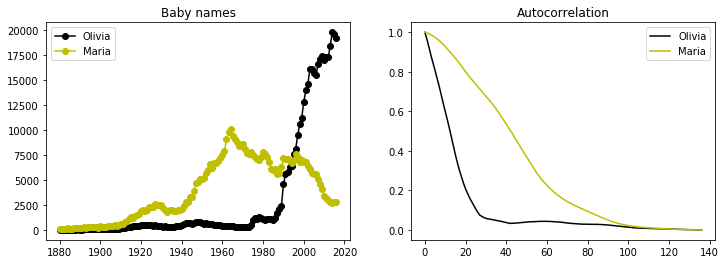

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
autocorr_name('Olivia', 'F', 'k', axes=axes)
autocorr_name('Maria', 'F', 'y', axes=axes)